In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [6]:
# Replace 'data.csv' with the actual path to your dataset
df = pd.read_csv('x.csv')

# Create an empty list to store the reshaped data
reshaped_data = []

# Iterate through each row in the original dataframe
for index, row in df.iterrows():
    subdivision = row['SUBDIVISION']
    year = row['YEAR']
    
    # Iterate through the columns representing months
    for month in df.columns[2:]:
        year_month = f"{year}-{month.zfill(2)}"
        rainfall = row[month]
        
        # Append the data in the desired format to the reshaped_data list
        reshaped_data.append([subdivision, year_month, rainfall])

# Create a new dataframe using the reshaped_data list
reshaped_df = pd.DataFrame(reshaped_data, columns=['SUBDIVISION', 'YEAR-MONTH', 'RAINFALL'])

# Print the reshaped dataframe
print(reshaped_df)

reshaped_df.to_csv('rainfall.csv')

                     SUBDIVISION YEAR-MONTH  RAINFALL
0      ANDAMAN & NICOBAR ISLANDS   1901-JAN      49.2
1      ANDAMAN & NICOBAR ISLANDS   1901-FEB      87.1
2      ANDAMAN & NICOBAR ISLANDS   1901-MAR      29.2
3      ANDAMAN & NICOBAR ISLANDS   1901-APR       2.3
4      ANDAMAN & NICOBAR ISLANDS   1901-MAY     528.8
...                          ...        ...       ...
49387                LAKSHADWEEP   2015-AUG     146.4
49388                LAKSHADWEEP   2015-SEP     160.4
49389                LAKSHADWEEP   2015-OCT     165.4
49390                LAKSHADWEEP   2015-NOV     231.0
49391                LAKSHADWEEP   2015-DEC     159.0

[49392 rows x 3 columns]


In [7]:
# Remove rows with NaN values and zeros in the 'RAINFALL' column
reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

In [8]:
# Remove rows with NaN values and zeros in the 'RAINFALL' column
reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

# Convert 'YEAR-MONTH' to datetime
reshaped_df_cleaned['YEAR-MONTH'] = pd.to_datetime(reshaped_df_cleaned['YEAR-MONTH'], format='%Y-%b')

# Filter the data for the chosen subdivision (e.g., 'ANDAMAN & NICOBAR ISLANDS')
subdivision_data = reshaped_df_cleaned[reshaped_df_cleaned['SUBDIVISION'] == 'PUNJAB']

# Set 'YEAR-MONTH' as the index for time series analysis
subdivision_data.set_index('YEAR-MONTH', inplace=True)

# Sort the data based on the index (time series data should be sorted chronologically)
subdivision_data.sort_index(inplace=True)


rainfall_data = subdivision_data['RAINFALL']

In [9]:
rainfall_data.tail(10)

YEAR-MONTH
2015-03-01     68.5
2015-04-01     29.8
2015-05-01     16.7
2015-06-01     48.3
2015-07-01    130.2
2015-08-01     88.6
2015-09-01     69.2
2015-10-01      9.0
2015-11-01      0.8
2015-12-01      0.7
Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

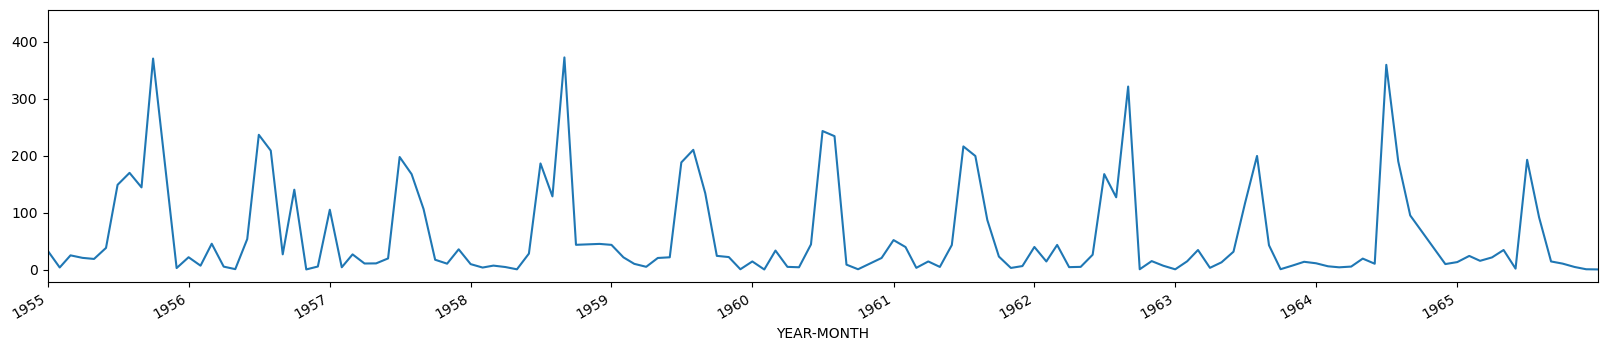

In [11]:
plt.figure(figsize=(20, 4)) 
rainfall_data.plot(xlim=['1955-01-01','1965-12-31'])

In [12]:
rainfall_data.dtypes

dtype('float64')

In [53]:
# start_date = pd.to_datetime('1901-01-01')
# end_date = pd.to_datetime('1950-12-31')

# # Boolean indexing to remove the specified range
# rainfall_data = rainfall_data[(rainfall_data.index < start_date) | (rainfall_data.index >= end_date)]

# print(rainfall_data)

YEAR-MONTH
1951-01-01     82.7
1951-02-01      7.2
1951-04-01     45.4
1951-05-01    259.0
1951-06-01    619.9
              ...  
2015-08-01    480.0
2015-09-01    523.3
2015-10-01    252.1
2015-11-01    236.3
2015-12-01    129.9
Name: RAINFALL, Length: 767, dtype: float64


<Axes: xlabel='YEAR-MONTH'>

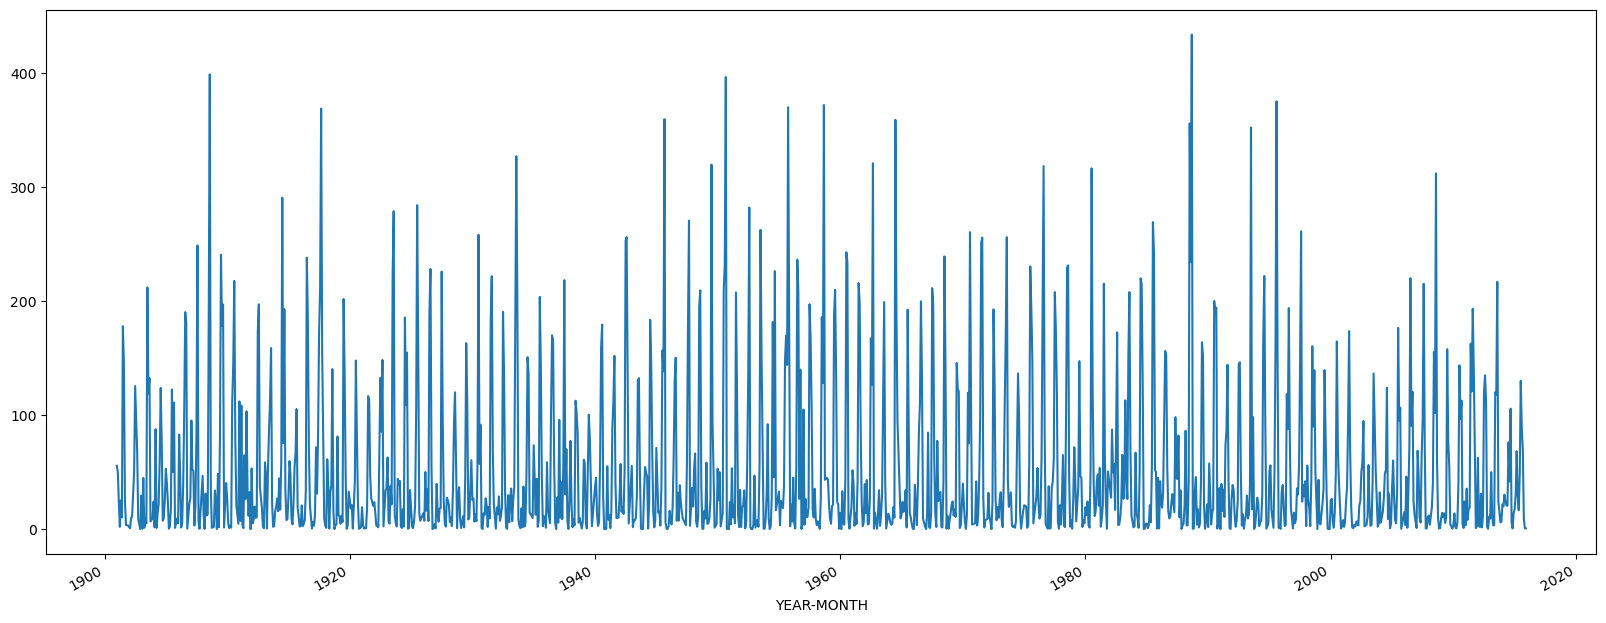

In [13]:
plt.figure(figsize=(20, 8)) 
rainfall_data.plot()

<Axes: xlabel='YEAR-MONTH'>

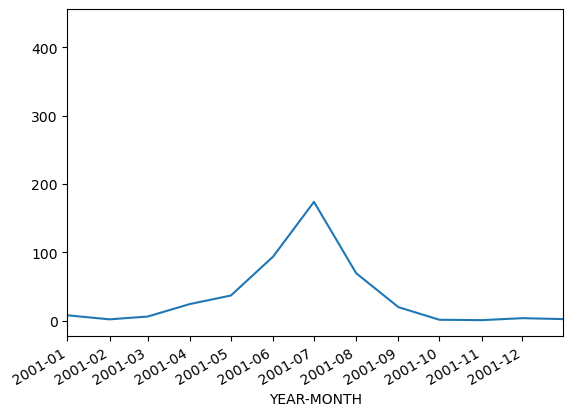

In [14]:
rainfall_data.plot(xlim=['2001-01-01','2001-12-31'])

<Axes: xlabel='YEAR-MONTH'>

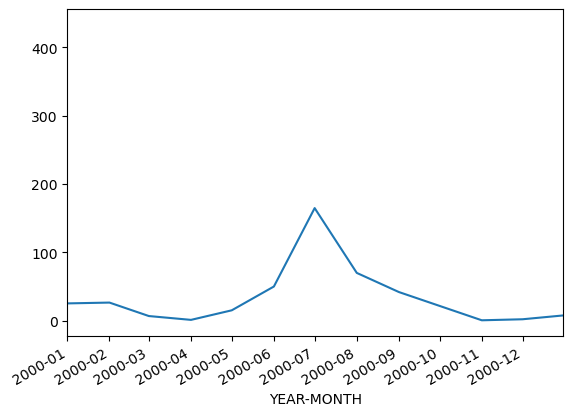

In [15]:
rainfall_data.plot(xlim=['2000-01-01','2000-12-31'])

In [16]:
rainfall_data.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='YEAR-MONTH', length=1313, freq=None)

In [17]:
## rule A year end frequency
rainfall_data_min_y = rainfall_data.resample(rule='A').min()
rainfall_data_min_y.head()

YEAR-MONTH
1901-12-31    2.1
1902-12-31    0.1
1903-12-31    0.5
1904-12-31    1.2
1905-12-31    0.5
Freq: A-DEC, Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

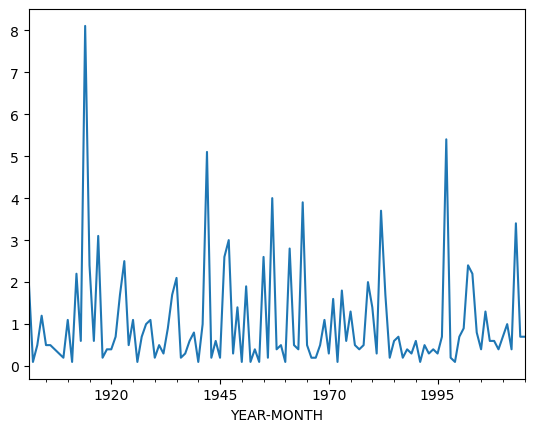

In [18]:
rainfall_data_min_y.plot()

In [19]:
## quartely start frequency
rainfall_data_min_q = rainfall_data.resample(rule='QS').min()
rainfall_data_min_q.head(5)

YEAR-MONTH
1901-01-01    25.2
1901-04-01     2.1
1901-07-01    24.4
1901-10-01     3.3
1902-01-01     0.8
Freq: QS-JAN, Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

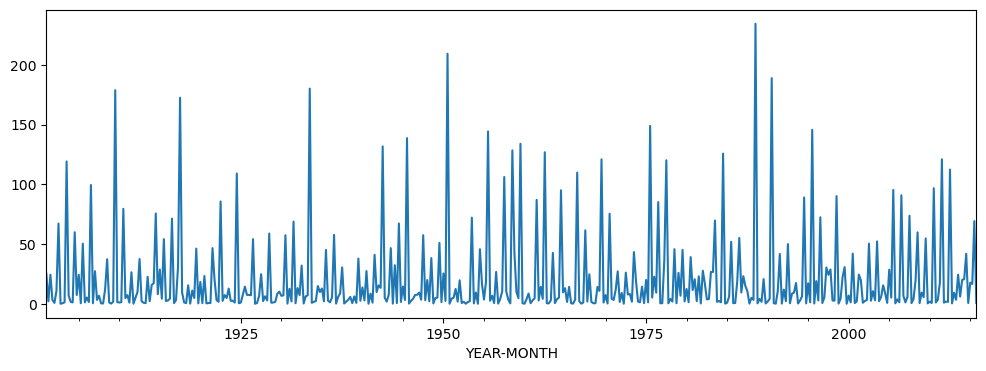

In [20]:
rainfall_data_min_q.plot(figsize=(12,4))

In [21]:
rainfall_data_max_y = rainfall_data.resample(rule='A').max()
rainfall_data_max_y.head()

YEAR-MONTH
1901-12-31    178.2
1902-12-31    125.6
1903-12-31    212.2
1904-12-31    124.0
1905-12-31    122.6
Freq: A-DEC, Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

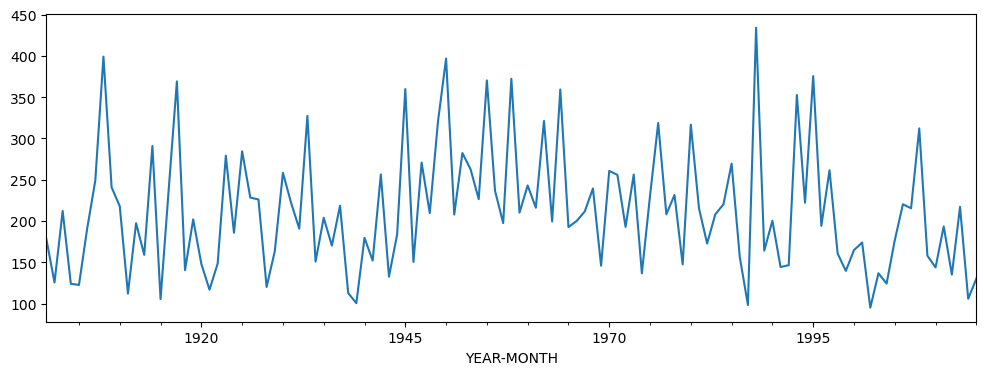

In [22]:
rainfall_data_max_y.plot(figsize=(12,4))

In [23]:
rainfall_data_max_q = rainfall_data.resample(rule='QS').max()
rainfall_data_max_q.head(5)

YEAR-MONTH
1901-01-01     55.7
1901-04-01     25.2
1901-07-01    178.2
1901-10-01      3.7
1902-01-01      9.9
Freq: QS-JAN, Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

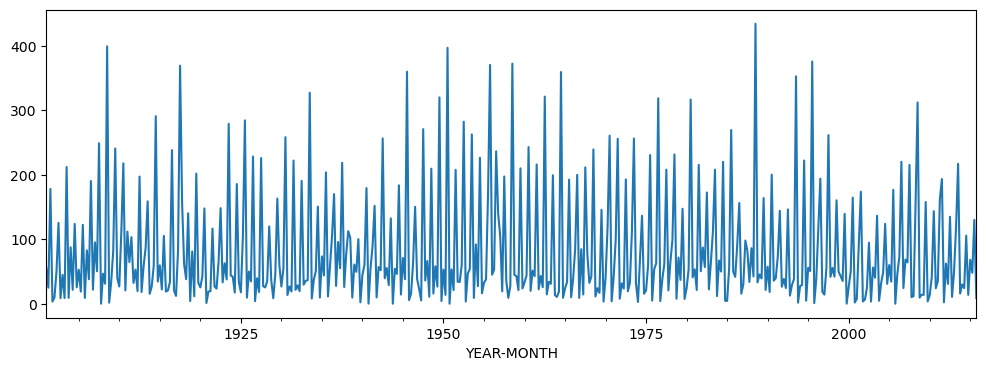

In [24]:
rainfall_data_max_q.plot(figsize=(12,4))

In [25]:
rainfall_data.resample(rule='A').mean()
rainfall_data.head(5)

YEAR-MONTH
1901-01-01    55.7
1901-02-01    50.1
1901-03-01    25.2
1901-04-01     2.1
1901-05-01    25.2
Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

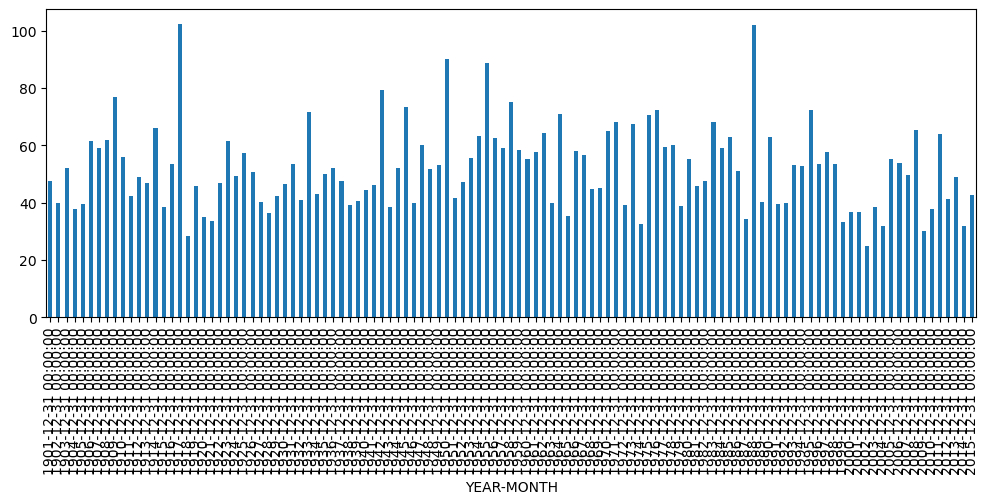

In [26]:
rainfall_data.resample(rule='A').mean().plot(kind='bar',figsize=(12,4))

In [27]:
rainfall_data_r = pd.DataFrame(rainfall_data)
rainfall_data_r['1YR R'] = rainfall_data_r['RAINFALL'].rolling(window=12,min_periods=1).mean()

In [24]:
rainfall_data_r.head()

,RAINFALL,1YR R
YEAR-MONTH,,
1951-01-01,82.7,82.700
1951-02-01,7.2,44.950
1951-04-01,45.4,45.100
1951-05-01,259.0,98.575
1951-06-01,619.9,202.840


<Axes: xlabel='YEAR-MONTH'>

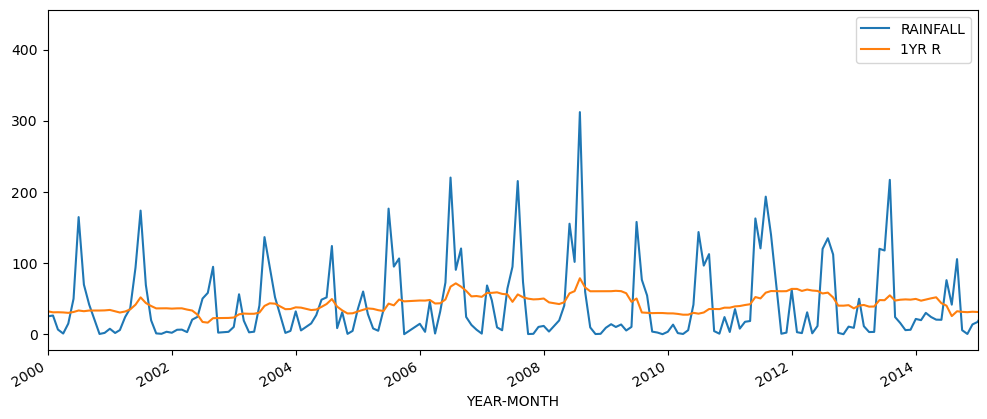

In [28]:
rainfall_data_r[['RAINFALL','1YR R']].plot(xlim=['2000-01-01','2015-01-01'],figsize=(12,5))

In [29]:
rainfall_data_cr = pd.DataFrame(rainfall_data)
rainfall_data_cr['1YR R'] = rainfall_data_cr['RAINFALL'].expanding().mean()

<Axes: xlabel='YEAR-MONTH'>

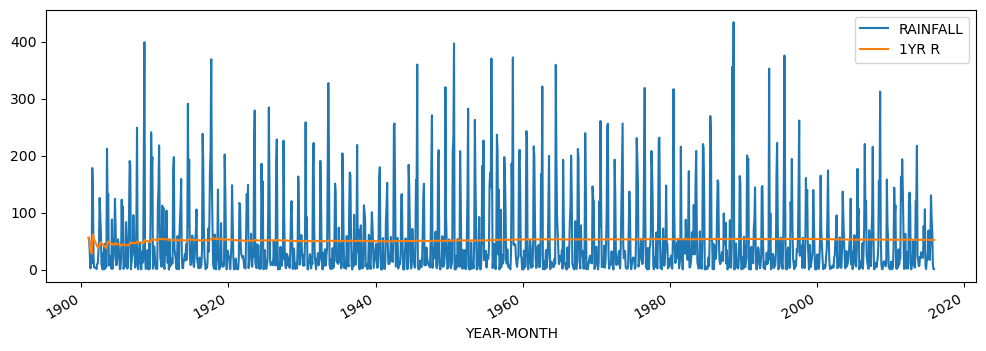

In [30]:
rainfall_data_cr.plot(figsize=(12,4))

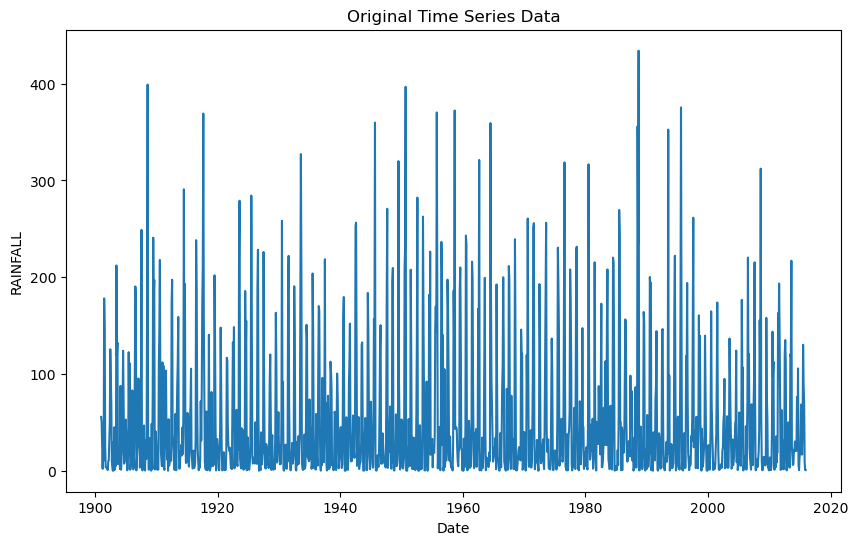

In [31]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

rainfall_data = pd.DataFrame(rainfall_data)
plt.figure(figsize=(10, 6))
plt.plot(rainfall_data['RAINFALL'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('RAINFALL')
plt.show()

In [32]:

# Perform Augmented Dickey-Fuller test
result = adfuller(rainfall_data['RAINFALL'])
print("ADF Test Results:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check p-value against significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Test Results:
ADF Statistic: -6.642853842482807
p-value: 5.355578714608263e-09
Critical Values:
   1%: -3.435433297366533
   5%: -2.863784847800804
   10%: -2.5679651739400224
Reject the null hypothesis. Data is stationary.


<Figure size 2000x1500 with 0 Axes>

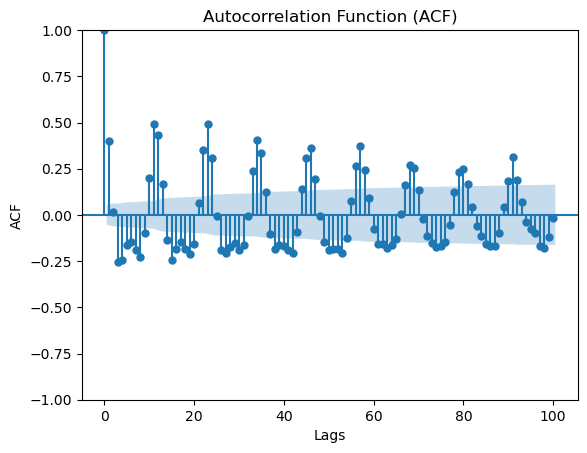

<Figure size 2000x1500 with 0 Axes>

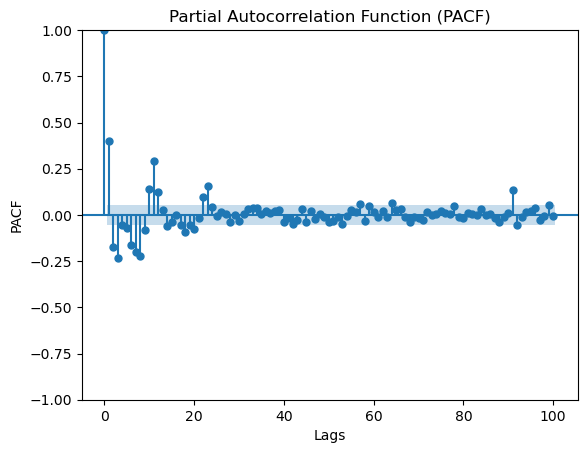

In [35]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(20, 15))
plot_acf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(20, 15))
plot_pacf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [39]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [40]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(rainfall_data)

In [41]:
train_size = int(len(rainfall_data) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [33]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [34]:
test_data

,RAINFALL
YEAR-MONTH,
2001-01-01,89.0
2001-02-01,15.7
2001-03-01,143.3
2001-04-01,30.1
2001-05-01,705.3
...,...
2010-08-01,563.8
2010-09-01,263.3
2010-10-01,402.4


In [35]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# p=1,3,4,5,6,7,10,11,12  seasonal for sarimax = 6  ,q =10/54

model_ARIMA=ARIMA(rainfall_data['RAINFALL'],order=(1,0,10))
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               RAINFALL   No. Observations:                  767
Model:                    ARMA(1, 10)   Log Likelihood               -4914.903
Method:                       css-mle   S.D. of innovations            146.683
Date:                Mon, 28 Aug 2023   AIC                           9855.806
Time:                        11:20:31   BIC                           9916.158
Sample:                             0   HQIC                          9879.037
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             246.3376      5.692     43.279      0.000     235.182     257.494
ar.L1.RAINFALL      0.7537      0.061     12.335      0.000       0.634       0.873
ma.L1.RAINFALL     -0.4283      0.069     -6.242      0.000      -0.563      -0.294
ma.L2.RAINFALL     -0.1555      0.041     -3.748      0.000      -0.237      -0.074
ma.L3.RAINFALL     -0.1128      0.047     -2.415      0.016      -0.204      -0.021
ma.L4.RAINFALL     -0.0400      0.048     -0.827      0.408      -0.135       0.055
ma.L5.RAINFALL     -0.0934      0.052     -1.809      0.071      -0.195       0.008
ma.L6.RAINFALL     -0.0879      0.041     -2.161      0.031      -0.168      -0.008
ma.L7.RAINFALL     -0.1450      0.056     -2.606      0.009      -0.254      -0.036
ma.L8.RAINFALL      0.0598      0.045      1.317      0.188      -0.029       0.149
ma.L9.RAINFALL      0.0967      0.050      1.945      0.052      -0.001       0.194
ma.L10.RAINFALL     0.1718      0.038      4.538      0.000       0.098       0.246
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.3268           +0.0000j            1.3268            0.0000
MA.1             1.0601           -0.1640j            1.0727           -0.0244
MA.2             1.0601           +0.1640j            1.0727            0.0244
MA.3             0.6622           -0.8910j            1.1101           -0.1483
MA.4             0.6622           +0.8910j            1.1101            0.1483
MA.5            -0.0771           -1.2358j            1.2382           -0.2599
MA.6            -0.0771           +1.2358j            1.2382            0.2599
MA.7            -1.1615           -0.4375j            1.2411           -0.4427
MA.8            -1.1615           +0.4375j            1.2411            0.4427
MA.9            -0.7652           -1.0737j            1.3184           -0.3485
MA.10           -0.7652           +1.0737j            1.3184            0.3485
------------------------------------------------------------------------------
"""

In [36]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2001-01-01 00:00:00
2010-12-01 00:00:00


In [37]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=rainfall_data['RAINFALL']-pred

In [38]:
pred

YEAR-MONTH
2001-01-01    171.185654
2001-02-01    198.985763
2001-03-01    162.388504
2001-04-01    223.281098
2001-05-01    177.762317
                 ...    
2010-08-01    397.785937
2010-09-01    414.845216
2010-10-01    296.278230
2010-11-01    304.210310
2010-12-01    172.356988
Length: 117, dtype: float64

In [39]:
residuals

YEAR-MONTH
1951-01-01   NaN
1951-02-01   NaN
1951-04-01   NaN
1951-05-01   NaN
1951-06-01   NaN
              ..
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
2015-11-01   NaN
2015-12-01   NaN
Length: 767, dtype: float64

<AxesSubplot:ylabel='Density'>

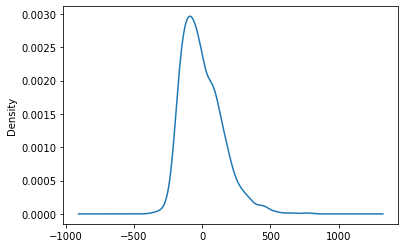

In [40]:
model_Arima_fit.resid.plot(kind='kde')

In [41]:
test_data['Predicted_ARIMA']=pred

C:\Users\ayodh\AppData\Local\Temp/ipykernel_21692/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='YEAR-MONTH'>

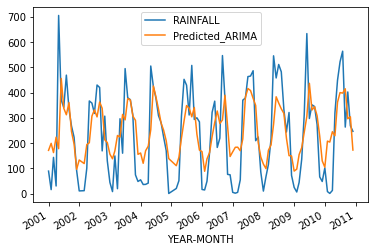

In [42]:
test_data[['RAINFALL','Predicted_ARIMA']].plot()